<a href="https://colab.research.google.com/github/Anithahd/haikus-for-codespaces/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [99]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [100]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [101]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [102]:
iqr = df.Chirps_Second.quantile(0.75)-df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Chirps_Second.quantile(0.25) - (1.5 * iqr) 
lower_threshold,upper_threshold

(12.9, 19.699999999999996)

In [ ]:
# no outliers

In [103]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [104]:
df = df.drop_duplicates()
df.shape

(15, 2)

In [105]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

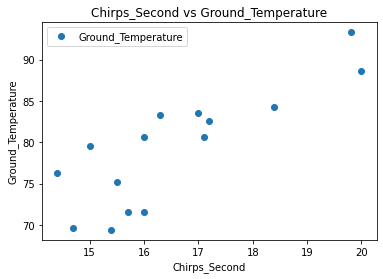

In [106]:
# EDA
df.plot(x='Chirps_Second', y='Ground_Temperature', style='o')
plt.title('Chirps_Second vs Ground_Temperature')
plt.xlabel('Chirps_Second')
plt.ylabel('Ground_Temperature')
plt.show()

In [107]:
#Correlation
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [108]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [109]:
X = df.loc[:, ['Chirps_Second']].values
y = df.loc[:, 'Ground_Temperature'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [110]:
y_test

array([82.6, 88.6, 69.4, 69.7, 76.3])

In [111]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [114]:
X_test

array([[17.2],
       [20. ],
       [15.4],
       [14.7],
       [14.4]])

In [115]:
# Modelling
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()
regressor.fit(X_train, y_train) #GD is done and we get the final values of m and c

LinearRegression()

In [116]:
print(regressor.intercept_) #c

20.56858867610321


In [117]:
print(regressor.coef_) # slope - m

[3.58461699]


In [118]:
regressor.predict([[95]])

array([361.10720233])

In [119]:
y_pred = regressor.predict(X_test)
y_pred

array([82.22400083, 92.26092839, 75.77169026, 73.26245837, 72.18707327])

In [120]:
df1=pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df1

,Actual,Predicted
0,82.6,82.224001
1,88.6,92.260928
2,69.4,75.771690
3,69.7,73.262458
4,76.3,72.187073


In [122]:
# Extrapolate data

regressor.predict([[21]])

array([95.84554538])

In [123]:
# Metrics
from sklearn import metrics
print('R2_Score', metrics.r2_score(y_test, y_pred))
regressor.score(X_test, y_test)

R2_Score 0.6975985213486147


0.6975985213486147

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [124]:
df = pd.read_fwf("brain_body.txt")

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [126]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [127]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [128]:
iqr = df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(119.60625, -70.80375000000001)

In [129]:
df.Brain = df.Brain.clip(119, -70)

In [130]:
iqr = df.Body.quantile(0.75)-df.Body.quantile(0.25)
upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(408.625, -238.375)

In [131]:
df.Body = df.Body.clip(408, -238)

In [132]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [133]:
df=df.drop_duplicates()
df.shape

(56, 2)

In [134]:
df.dtypes

Brain    float64
Body     float64
dtype: object

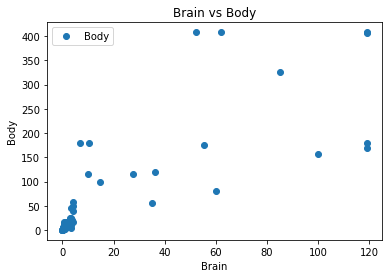

In [135]:
# EDA
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [136]:
# Correlation
df.corr()

,Brain,Body
Brain,1.000000,0.799397
Body,0.799397,1.000000


In [137]:
df.Body.values

array([4.450e+01, 1.550e+01, 8.100e+00, 4.080e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       3.000e-01, 3.500e+00, 1.150e+02, 2.560e+01, 5.000e+00, 1.750e+01,
       4.060e+02, 3.250e+02, 1.230e+01, 4.080e+02, 3.900e+00, 1.790e+02,
       5.600e+01, 1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01,
       1.210e+01, 1.750e+02, 1.570e+02, 4.080e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

In [138]:
df.loc[:, ['Brain']].values
df.loc[:, 'Body'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [139]:
y_test

array([69.7, 71.6, 93.3])

In [140]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [141]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [142]:
print(regressor.intercept_)
print(regressor.coef_)

34.751606875934264
[2.72010463]


In [143]:
regressor.predict([[435]])

array([1217.99712257])

In [144]:
y_pred = regressor.predict(X_test)
y_pred

array([74.73714499, 78.27328102, 88.60967862])

In [145]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,69.7,74.737145
1,71.6,78.273281
2,93.3,88.609679


In [146]:
# Metrics
from sklearn import metrics
print('R2_Score:', metrics.r2_score(y_test, y_pred))
regressor.score(X_test, y_test)

R2_Score: 0.7326955273030147


0.7326955273030147

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [5]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [6]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [8]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [55]:
df = df.drop_duplicates()
df.shape

(52, 7)

In [56]:
df.dtypes

Sex            int64
Rank           int64
Year           int64
Degree         int64
YSdeg          int64
Salary         int64
Transformed    int64
dtype: object

In [11]:
iqr = df.Sex.quantile(0.75)-df.Sex.quantile(0.25)
upper_threshold = df.Sex.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Sex.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(2.5, -1.5)

In [12]:
iqr = df.Rank.quantile(0.75)-df.Rank.quantile(0.25)
upper_threshold = df.Rank.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Rank.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(6.0, -2.0)

In [13]:
iqr = df.Year.quantile(0.75)-df.Year.quantile(0.25)
upper_threshold = df.Year.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Year.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(23.0, -9.0)

In [14]:
iqr = df.Degree.quantile(0.75)-df.Degree.quantile(0.25)
upper_threshold = df.Degree.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Degree.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(2.5, -1.5)

In [15]:
iqr = df.YSdeg.quantile(0.75)-df.YSdeg.quantile(0.25)
upper_threshold = df.YSdeg.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.YSdeg.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(48.0, -18.0)

In [16]:
df.YSdeg = df.YSdeg.clip(-18, 48)

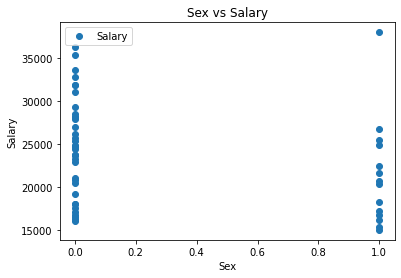

In [17]:
# EDA
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [18]:
# correlation

df[['Sex', 'Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


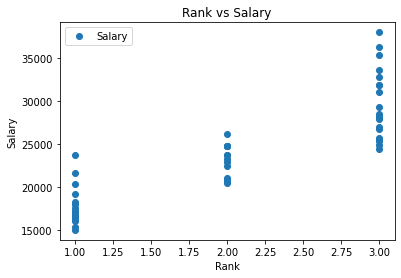

In [19]:
# EDA
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [20]:
df[['Rank', 'Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


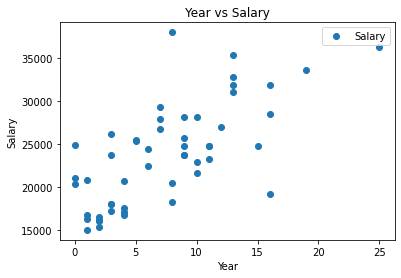

In [21]:
# EDA
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [22]:
df[['Year', 'Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


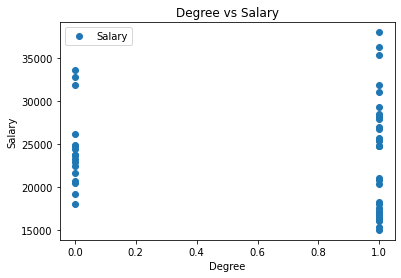

In [23]:
# EDA
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [24]:
df[['Degree', 'Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


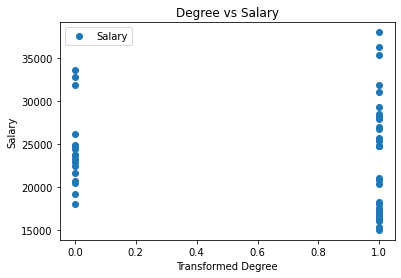

,Transformed,Salary
Transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [25]:
df['Transformed']=(df['Degree'])
df.plot(x='Transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Transformed Degree')
plt.ylabel('Salary')
plt.show()
df[['Transformed', 'Salary']].corr()

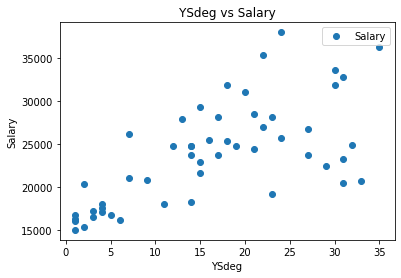

In [26]:
# EDA
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [74]:
df[['YSdeg', 'Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [87]:
X = df[['Sex', 'Rank', 'Year', 'YSdeg']].values # arrray of features
y = df['Salary'].values # array of targets

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [89]:
from sklearn.preprocessing import StandardScaler # standard scaling
scaler = StandardScaler() #intiliaze to a variable
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [91]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,531.812406
Rank,4342.457424
Year,2410.479362
YSdeg,-745.406917


In [92]:
regressor.predict(scaler.transform(np.array([[1, 3, 13, 21]])))


array([31622.66982224])

In [93]:
regressor.intercept_

24157.536585365855

In [94]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,18304,19688.149838
1,16686,17533.888596
2,18000,16465.058697
3,20850,20827.415815
4,24900,24915.644987
5,32850,29652.309870
6,23712,23047.405951
7,17095,17454.874308
8,16094,16784.365934
9,33696,32433.907255


In [96]:
from sklearn import metrics
print('R2-SCORE:', metrics.r2_score(y_test, y_pred))

R2-SCORE: 0.9531656931356928


In [ ]:
# In this data analysis, the correlation of 'Sex and Salary' is good. Females are getting more salary than Male. So 'Sex' is considered as an important factor of Salary.